# RandomForest

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [2]:
from sklearn.ensemble import RandomForestClassifier

## 데이터 가져오기

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- train은 12열, test는 11열
- feature는 총 11개고, train의 Survived가 label에 해당하는 것 같다.
- DataFrame.info()로 데이터의 info (각 열의 정보)를 확인해볼 수 있다.
- train.info(), test.info()를 찍어보자

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Feature별로 데이터 정리하기
- train 데이터를 input, labels로 분리하기 전에, Feature(열)을 보면서 정리해주어야 한다.
- 필요없는 열을 지우고, 결측치를 처리하는 등.
- 주의깊게 봐야 할 부분은 다음과 같다.
  - 결측치가 있는가?
    - 결측치가 있다면, Drop할 것인가? 다른 값으로 채워넣을 것인가?
  - 데이터는 float64형으로 변환할 수 있는가? 아니라면 범주형 데이터로 만들 수 있는가?

### 결측치 확인
- 결측치가 있는지 시각화해서 먼저 알아보자
- 시각화는 그냥 수단일 뿐이고, 위에서 본 info가 가장 정확하다.

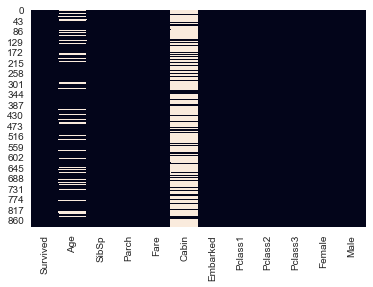

In [24]:
sns.heatmap(train.isnull(), cbar=False)

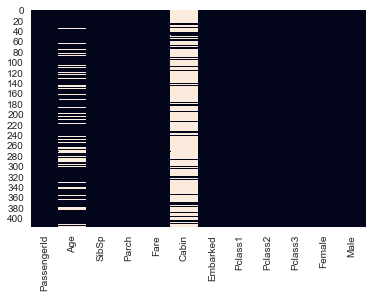

In [25]:
sns.heatmap(test.isnull(), cbar=False)

- Age랑 Cabin이 많이 비어 보인다.
- 일단은 바로 drop할 게 아니면 그대로 두고, 이따가 Column 하나하나 보면서 처리할 때 기억해두자.

### 필요없는 Column 버리기
- 의미상으로 필요없어 보이는 Column들은 미리 버릴 수 있다.
- PassengerId, Name, Ticket은 필요없을 것 같다.
- 단, 결과는 (PassengerId, Survived) 형식으로 나와야 하므로 test에서는 PassengerId를 지우면 안 된다.

In [11]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)
test = test.drop(["Name", "Ticket"], axis=1)

- 남은 것들은 다음과 같다.
  - Pclass
  - Sex
  - Age 
  - SibSp
  - Parch
  - Fare
  - Cabin
  - Embarked
- 하나씩 보면서 정리하자

### PClass

- 각 unique한 value에 대해 DataFrame.value_counts()로 카운트를 찍어볼 수 있다.

In [12]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

> 1,2,3은 정수이니, 그냥 실수로만 바꾸면 되지 않을까 생각할 수 있습니다. 하지만 1, 2, 3 등급은 경우에 따라 다를 수 있지만 연속적인 정보가 아니며, 각 차이 또한 균등하지 않습니다. 그렇기에 범주형(카테고리) 데이터로 인식하고 인코딩해야합니다. (비슷한 예시로 영화 별점 등이 있습니다.)
- 범주형 데이터는 one-hot encoding을 해볼 수 있다.
- `pd.get_dummies()` 메소드로 원핫인코딩이 가능하다.
  - 열 데이터를 넣으면, 범주로 나올 수 있는 데이터 따라서 알아서 원핫인코딩 된 DataFrame을 돌려준다.
  - 직접 보자

In [13]:
pclass_train_dummies = pd.get_dummies(train["Pclass"])
pclass_train_dummies.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


- dummies의 각 열 이름을 바꿔주고, 원본 train에서 Pclass를 drop하고, 우리가 만든 dummies 데이터를 join시켜주자.

In [14]:
pclass_train_dummies.columns = ["Pclass1", "Pclass2", "Pclass3"]
train = train.drop(["Pclass"], axis=1)
train = train.join(pclass_train_dummies)

In [15]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass1,Pclass2,Pclass3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1


- test 데이터도 똑같이 해 주자

In [16]:
pclass_test_dummies = pd.get_dummies(test["Pclass"])
pclass_test_dummies.columns = ["Pclass1", "Pclass2", "Pclass3"]
test = test.drop(["Pclass"], axis=1)
test = test.join(pclass_test_dummies)

### Sex

In [17]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- 얘도 범주형이니까 one-hot encoding을 하면 될 것 같다. 
- Pclass와 똑같이 해 주자.

In [18]:
sex_train_dummies = pd.get_dummies(train["Sex"])
sex_train_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [19]:
sex_train_dummies.columns = ["Female", "Male"]
train = train.drop(["Sex"], axis=1)
train = train.join(sex_train_dummies)

In [20]:
sex_test_dummies = pd.get_dummies(test["Sex"])
sex_test_dummies.columns = ["Female", "Male"]
test = test.drop(["Sex"], axis=1)
test = test.join(sex_test_dummies)

### Age

In [21]:
train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

- 나이는 범주형 데이터가 아닌 연속형 데이터이므로, 별도 처리가 필요없다.
  - 카테고리화해서 일부 알고리즘에 더 유용한 결과를 낼 수 있기도 하다.
- Age는 아까 봤듯이 결측치가 있었다. 어떻게 처리할까?
  - 보통 랜덤/평균값/중간값/Drop
  - 평균값으로 일단 해 보자.
  - 여기서는 test의 Age도 train의 Age 평균값으로 채웠는데, 이는 데이터의 통일성을 위함이다.

In [27]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(train["Age"].mean())

### SibSp, Parch
- 형제자매, 부모님
- 딱히 처리할 필요는 없어 보인다.

In [31]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Fare
- 맨 처음 info()에서 알 수 있듯이, test의 Fare에서 하나가 빈다.
- 뭐 평균으로 채워 보자.

In [34]:
train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [28]:
train["Fare"] = train["Fare"].fillna(train["Fare"].mean())
test["Fare"] = test["Fare"].fillna(train["Fare"].mean())

### Cabin
- 아까 봤듯이 결측치가 너무 많았다.
- 살릴 수 없을 것 같을 땐 버리자.

In [35]:
train["Cabin"].value_counts()

KeyError: 'Cabin'

In [29]:
train = train.drop(["Cabin"], axis=1)
test = test.drop(["Cabin"], axis=1)

### Embarked
- 탑승 항구
- 이것도 맨 위 info()에서 보면 train에서 2개 정도 비는 걸 확인할 수 있다.

In [36]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- S가 대부분이니까 결측치 2개는 S로 채우자.

In [37]:
train["Embarked"] = train["Embarked"].fillna("S")

- 그리고 범주형 데이터이므로, 마찬가지로 원핫인코딩 해서 원래 DataFrame에 join해준다.

In [38]:
embarked_train_dummies = pd.get_dummies(train["Embarked"])
embarked_train_dummies.columns = ["Embarked_S", "Embarked_C", "Embarked_Q"]
train = train.drop(["Embarked"], axis=1)
train = train.join(embarked_train_dummies)

In [39]:
embarked_test_dummies = pd.get_dummies(test["Embarked"])
embarked_test_dummies.columns = ["Embarked_S", "Embarked_C", "Embarked_Q"]
test = test.drop(["Embarked"], axis=1)
test = test.join(embarked_test_dummies)

## 레이블 나누기
- train을 train_input, train_labels로, test를 test_labels로

In [41]:
# 졸려